Question 01

51
0
100
0
105
256


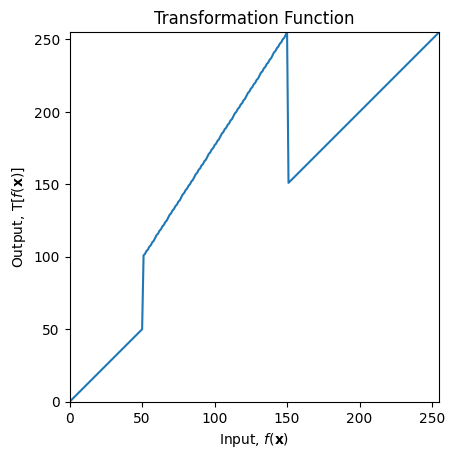

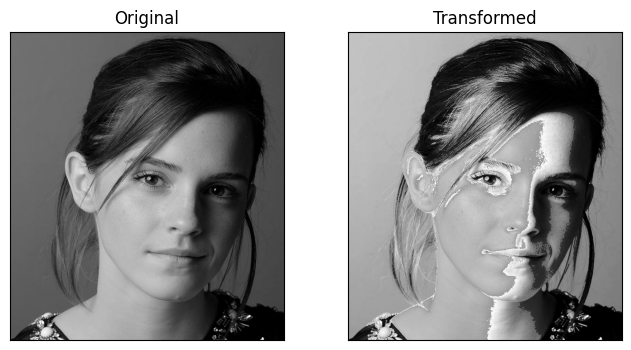

In [29]:
# Importing necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Creating an array 'c'
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

# Generating linearly spaced values for the transformation
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))

t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
print(len(t3))

t4 = np.linspace(c[2,1] + 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
print(len(t4))

t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')
print(len(t5))

# Concatenating the transform1ations to create the final 'transform1' array
transform1 = np.concatenate((t1, t2), axis=0).astype('uint8')
transform1 = np.concatenate((transform1, t3), axis=0).astype('uint8')
transform1 = np.concatenate((transform1, t4), axis=0).astype('uint8')
transform1 = np.concatenate((transform1, t5), axis=0).astype('uint8')
print(len(transform1))

# Creating a plot using matplotlib
fig, ax = plt.subplots()
ax.plot(transform1)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_title('Transformation Function')
ax.set_aspect('equal')
plt.savefig('q1.png', dpi=300)
plt.show()

img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
# cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
# cv.imshow("Image", img_orig)
# cv.waitKey(0)
image_transformed1 = cv.LUT(img_orig, transform1)
# cv.imshow("Image", image_transformed111)
# cv.waitKey(0)
# cv.destroyAllWindows()
f = plt.figure(figsize=(8,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(img_orig), ax1.title.set_text('Original')
ax2.imshow(image_transformed1), ax2.title.set_text('Transformed')
ax1.set_xticks([]), ax1.set_yticks([])  
ax2.set_xticks([]), ax2.set_yticks([]) 
plt.show()

Question 02


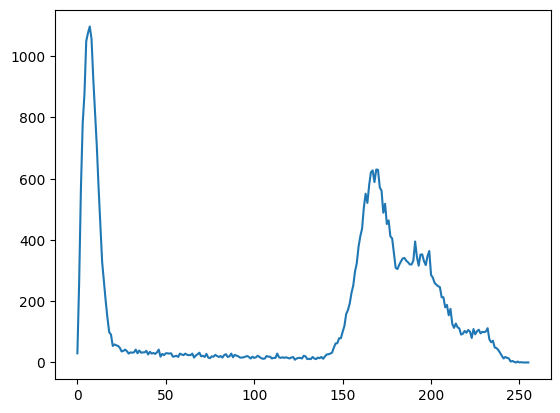

In [11]:
#import libraries
import PIL
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt

img = cv.imread('images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)

# find frequency of pixels in range 0-255
histr = cv.calcHist([img],[0],None,[256],[0,256])

# show the plotting graph of an image
plt.plot(histr)
plt.show()

# this graph helps us to determine which areas needs to be accented

151
0
105
256


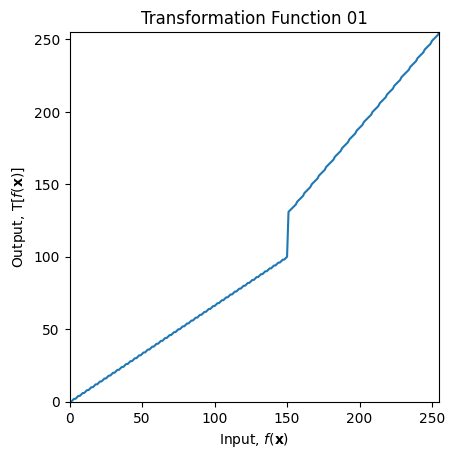

51
100
105
256


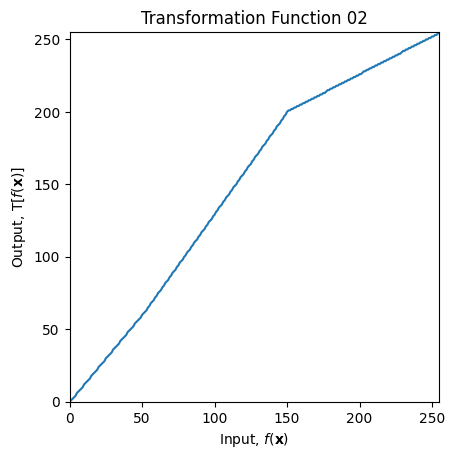

([], [])

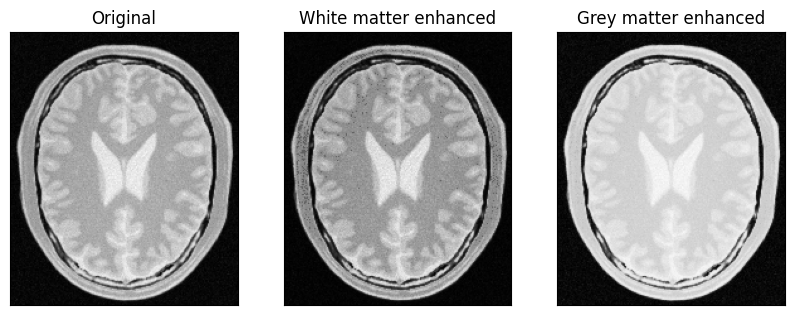

In [1]:
# Importing necessary libraries
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


#-------------------------------------------------------------

# Transform 01
# Creating an array 'c'
c = np.array([(150, 100), (150, 130)])

# Generating linearly spaced values for the transformation
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))

t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

# Concatenating the transformations to create the final 'transform1' array
transform1 = np.concatenate((t1, t2), axis=0).astype('uint8')
transform1 = np.concatenate((transform1, t3), axis=0).astype('uint8')
print(len(transform1))

# Creating a plot using matplotlib
fig, ax = plt.subplots()
ax.plot(transform1)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_title('Transformation Function 01')
ax.set_aspect('equal')
plt.savefig('q1.png')
plt.show()

#-------------------------------------------------------------
# Transform 02
# Creating an array 'c'
c = np.array([(50, 60), (150, 200)])

# Generating linearly spaced values for the transformation
t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
print(len(t1))

t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
print(len(t2))

t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')
print(len(t3))

# Concatenating the transformations to create the final 'transform1' array
transform2 = np.concatenate((t1, t2), axis=0).astype('uint8')
transform2 = np.concatenate((transform2, t3), axis=0).astype('uint8')
print(len(transform1))

# Creating a plot using matplotlib
fig, ax = plt.subplots()
ax.plot(transform2)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\\mathrm{T}[f(\\mathbf{x})]$')
ax.set_xlim([0, 255])
ax.set_ylim([0, 255])
ax.set_title('Transformation Function 02')
ax.set_aspect('equal')
plt.savefig('q1.png')
plt.show()


#-------------------------------------------------------------


#function to remove salt and pepper noise
def remove_salt_pepper_noise(image):
    # Apply median filter
    kernal_size = 1
    filtered = cv.medianBlur(image, kernal_size) 
    return filtered

img_orig = cv.imread('images/BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
# cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
# cv.imshow("Image", img_orig)
# cv.waitKey(0)
image_transformed1 = cv.LUT(img_orig, transform1)
image_transformed1 = remove_salt_pepper_noise(image_transformed1)
image_transformed2 = cv.LUT(img_orig, transform2)
image_transformed2 = remove_salt_pepper_noise(image_transformed2)
# cv.imshow("Image", image_transformed1)
# cv.waitKey(0)
# cv.destroyAllWindows()
f = plt.figure(figsize=(10,4))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax1.imshow(img_orig), ax1.title.set_text('Original')
ax2.imshow(image_transformed1), ax2.title.set_text('White matter enhanced')
ax3.imshow(image_transformed2), ax3.title.set_text('Grey matter enhanced')
ax1.set_xticks([]), ax1.set_yticks([])  
ax2.set_xticks([]), ax2.set_yticks([]) 
ax3.set_xticks([]), ax3.set_yticks([])
# plt.show()

Question 03